In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

In [4]:
summary = pd.read_csv(os.path.join('nba', 'Team Summaries.csv'))
#correzzione errore dataset
pl_2023 = ['ATL', 'BOS', 'CLE', 'BRK', 'DEN', 'GSW', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NYK','PHI','PHO', 'SAC']
for team in pl_2023:
    summary.loc[(summary['abbreviation'] == team) & (summary['season'] == 2023) ,'playoffs'] = True
summary.to_parquet(os.path.join('team_summary.parquet'))
summary = pd.read_parquet(os.path.join('team_summary.parquet'))

In [5]:
summary.columns

Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'age', 'w', 'l',
       'pw', 'pl', 'mov', 'sos', 'srs', 'o_rtg', 'd_rtg', 'n_rtg', 'pace',
       'f_tr', 'x3p_ar', 'ts_percent', 'e_fg_percent', 'tov_percent',
       'orb_percent', 'ft_fga', 'opp_e_fg_percent', 'opp_tov_percent',
       'opp_drb_percent', 'opp_ft_fga', 'arena', 'attend', 'attend_g'],
      dtype='object')

In [6]:
total = pd.read_csv(os.path.join('nba', 'Team Totals.csv'))
total.columns

Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'g', 'mp', 'fg',
       'fga', 'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [8]:
## BAA -> Basketball Association of America
summary[summary['season']==2024]

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2024,NBA,Atlanta Hawks,ATL,False,26.2,36.0,46.0,36.0,46.0,...,11.6,27.1,0.200,0.572,12.4,75.2,0.192,State Farm Arena,696418.0,16986.0
1,2024,NBA,Boston Celtics,BOS,True,28.2,64.0,18.0,66.0,16.0,...,10.8,24.9,0.180,0.523,10.8,76.3,0.145,TD Garden,766240.0,18689.0
2,2024,NBA,Brooklyn Nets,BRK,False,26.1,32.0,50.0,34.0,48.0,...,11.8,25.2,0.177,0.543,11.4,76.0,0.193,Barclays Center,720291.0,17568.0
3,2024,NBA,Chicago Bulls,CHI,False,28.1,39.0,43.0,37.0,45.0,...,11.0,25.1,0.187,0.556,12.7,76.4,0.195,United Center,845620.0,20625.0
4,2024,NBA,Charlotte Hornets,CHO,False,25.1,21.0,61.0,18.0,64.0,...,12.6,21.1,0.167,0.572,12.3,74.5,0.188,Spectrum Center,674400.0,16449.0
5,2024,NBA,Cleveland Cavaliers,CLE,False,26.2,48.0,34.0,47.0,35.0,...,12.4,23.2,0.179,0.535,12.3,76.9,0.190,Rocket Mortgage Fieldhouse,793167.0,19432.0
6,2024,NBA,Dallas Mavericks,DAL,True,26.5,50.0,32.0,46.0,36.0,...,11.2,22.2,0.190,0.548,12.1,75.2,0.184,American Airlines Center,828897.0,20217.0
7,2024,NBA,Denver Nuggets,DEN,True,27.1,57.0,25.0,54.0,28.0,...,11.5,25.5,0.170,0.526,11.2,75.6,0.195,Ball Arena,807062.0,19684.0
8,2024,NBA,Detroit Pistons,DET,False,23.8,14.0,68.0,20.0,62.0,...,13.5,23.9,0.193,0.558,11.1,77.3,0.221,Little Caesars Arena,726378.0,18159.0
9,2024,NBA,Golden State Warriors,GSW,False,28.4,46.0,36.0,47.0,35.0,...,12.5,27.5,0.171,0.539,11.5,76.1,0.195,Chase Center,740624.0,18064.0


# evoluzione dell'NBA

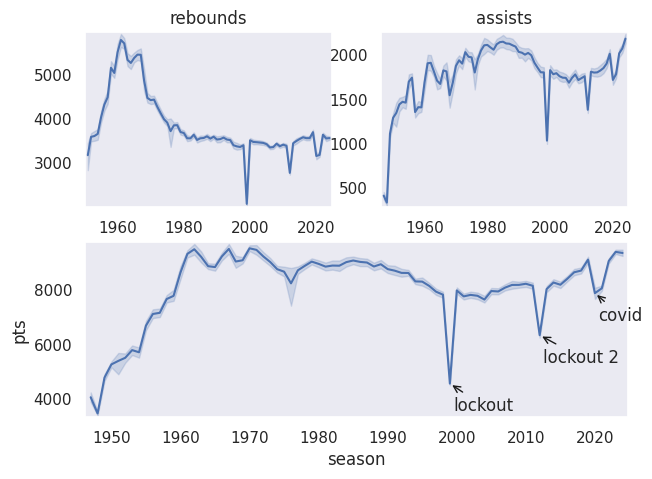

In [6]:
# vediamo com' è aumentato il numero di punti 
#pts = total.groupby('season')['pts'].mean()
#treb =total.groupby('season')['trb'].mean()
#ast = total.groupby('season')['ast'].mean()

sns.set_theme(style="dark")
plt.figure(figsize=(7,5))
ax1=plt.subplot(212)
ax1.margins(0.01)
sns.lineplot(total, x='season', y='pts',ax=ax1)
annotations = [(1999, 4579, 'lockout'), (2020, 7892, 'covid'), (2012, 6353, 'lockout 2')]
for point in annotations:
    plt.annotate(f'{point[2]}',
                 xy=(point[0], point[1]), xycoords='data',
                 xytext=(point[0]+0.5, point[1]-1000), textcoords='data',
                 arrowprops=dict(color='k',arrowstyle='->'))

ax2=plt.subplot(221)
ax2.margins(0.01)
sns.lineplot(total, x='season', y='trb', ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('rebounds')
ax3=plt.subplot(222)
ax3.margins(0.01)
sns.lineplot(total, x='season',y='ast', ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_title('assists')
plt.show()

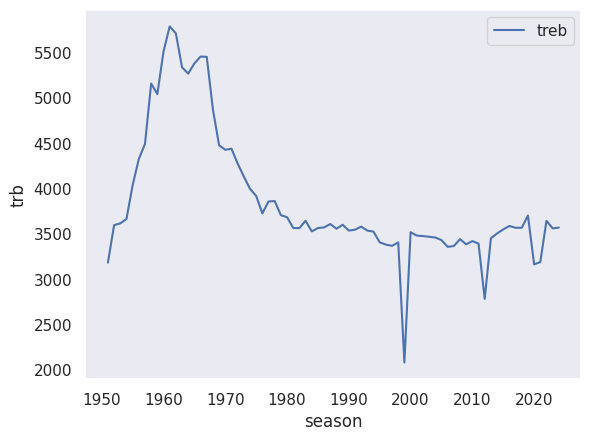

<function matplotlib.pyplot.show(close=None, block=None)>

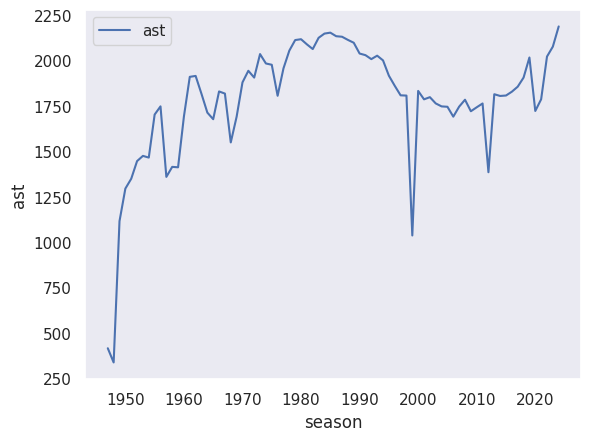

In [7]:
treb =total.groupby('season')['trb'].mean()
ast = total.groupby('season')['ast'].mean()
sns.set_theme(style="dark")
sns.lineplot(treb, label='treb')
plt.show()
sns.lineplot(ast, label = 'ast')
plt.show

In [9]:
#total[total['season']== 1999] # stagione del lockout
#pts[2012]

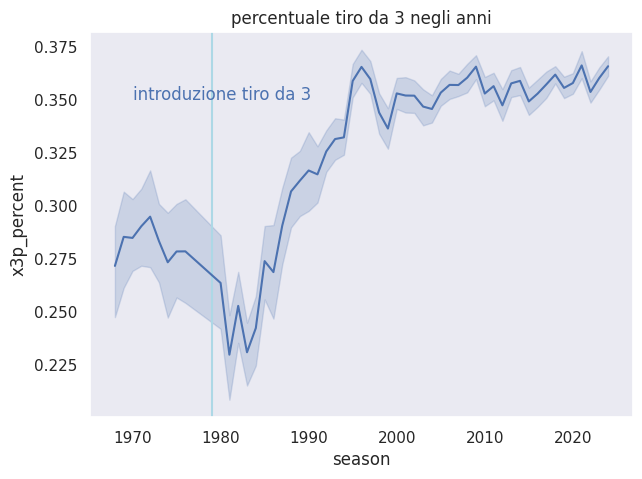

In [10]:

f,ax = plt.subplots(figsize=(7,5))
ax.axvline(x=1979, color='lightblue')
sns.lineplot(total,x='season', y='x3p_percent', ax=ax, color='b')
ax.annotate('introduzione tiro da 3',
                 xy=(1979, 0.35), xycoords='data',
                 xytext=(1970, 0.35), textcoords='data', color='b')

ax.set_title('percentuale tiro da 3 negli anni')
plt.savefig('plots/3p_percentage.png')

# analisi del tiro da 3

<Axes: xlabel='season', ylabel='x2p'>

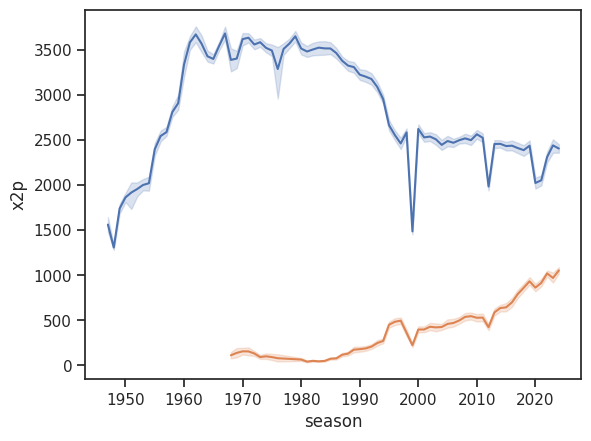

In [64]:
sns.set_theme(style="ticks")
# Show the joint distribution using kernel density estimation

#g=sns.jointplot(
#    data=total,
#    x="x3p", y="x2p",
#    kind="kde", )
#plt.axline((240, 2860), slope=2, color="grey", linestyle=(0, (5, 5)), alpha=0.5)
#plt.annotate('pre introduzione \ntiro 3 punti',(-150, 4180), size=9)
#plt.annotate('post introduzione \ntiro 3 punti',(1100, 4180),size=9)
#g.set_axis_labels(xlabel='3pts', ylabel='2pts')
#g.fig.suptitle("Distribuzione canestri 2 e 3 punti")
#g.fig.subplots_adjust(top=0.95)

#g.savefig('plots/distribuzione2vs3.png')

#f = sns.jointplot(
#    data=total,
#    x="x3pa", y="x2pa",
#    kind="kde"
#)
#plt.show()
sns.lineplot(total, x='season', y='x2p')
sns.lineplot(total, x='season', y='x3p')

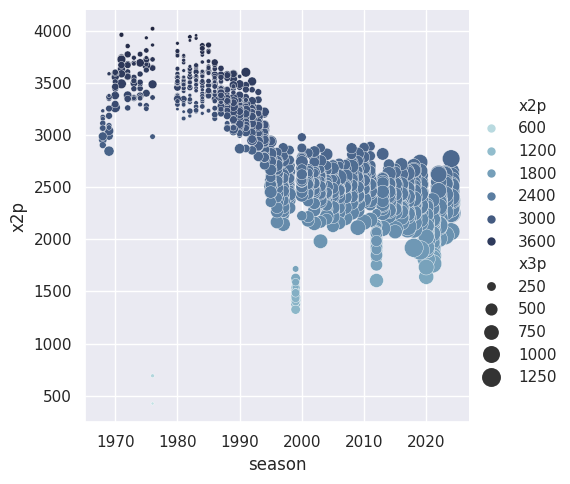

In [108]:

#sns.kdeplot(total[total['season']<1979], x='x2p', y='x3p', label='pre')
#sns.kdeplot(total[total['season']>=1979], x='x2p', y='x3p', label='post')
sns.set_theme(style="darkgrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.relplot(
    data=total,
    x="season", y="x2p",hue='x2p',
    size="x3p",
    palette=cmap, sizes=(5, 200)
)

<Axes: xlabel='x2p', ylabel='Count'>

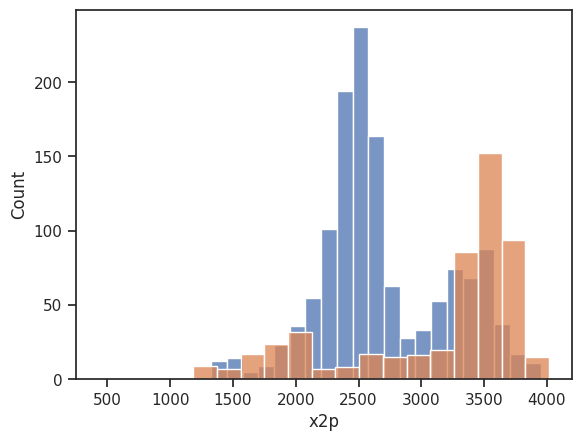

In [12]:
#print(np.argmin(total.groupby('season')['x2p'].mean()))
#print(total.iloc[1389])
sns.histplot(total[total['season']>=1979], x='x2p')
sns.histplot(total[total['season']<1979], x='x2p')

In [57]:
#print(sp.stats.pearsonr(total.dropna()['x3p_percent'], total.dropna()['x2p_percent'])[1])
#print(np.min(total['x3p']))
total

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,fta_per_game,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2024,NBA,Atlanta Hawks,ATL,False,26.2,36.0,46.0,36.0,46.0,...,23.2,12.5,32.2,44.7,26.6,7.5,4.5,13.5,18.6,118.3
1,2024,NBA,Boston Celtics,BOS,True,28.2,64.0,18.0,66.0,16.0,...,20.2,10.7,35.6,46.3,26.9,6.8,6.6,11.9,16.2,120.6
2,2024,NBA,Brooklyn Nets,BRK,False,26.1,32.0,50.0,34.0,48.0,...,20.9,11.4,32.6,44.1,25.6,6.8,5.2,13.1,18.5,110.4
3,2024,NBA,Chicago Bulls,CHI,False,28.1,39.0,43.0,37.0,45.0,...,21.1,11.2,32.6,43.8,25.0,7.8,4.8,12.2,18.8,112.3
4,2024,NBA,Charlotte Hornets,CHO,False,25.1,21.0,61.0,18.0,64.0,...,18.4,9.3,31.0,40.3,24.8,6.9,4.5,13.8,18.0,106.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,1947,BAA,Providence Steamrollers,PRO,False,NaN,28.0,32.0,25.0,35.0,...,27.8,NaN,NaN,NaN,8.0,NaN,NaN,NaN,20.3,72.5
1825,1947,BAA,St. Louis Bombers,STB,True,NaN,38.0,23.0,39.0,22.0,...,23.0,NaN,NaN,NaN,4.8,NaN,NaN,NaN,20.2,66.6
1826,1947,BAA,Toronto Huskies,TRH,False,NaN,22.0,38.0,17.0,43.0,...,25.9,NaN,NaN,NaN,7.7,NaN,NaN,NaN,21.2,66.6
1827,1947,BAA,Washington Capitols,WSC,True,NaN,49.0,11.0,53.0,7.0,...,23.2,NaN,NaN,NaN,6.3,NaN,NaN,NaN,19.1,73.8


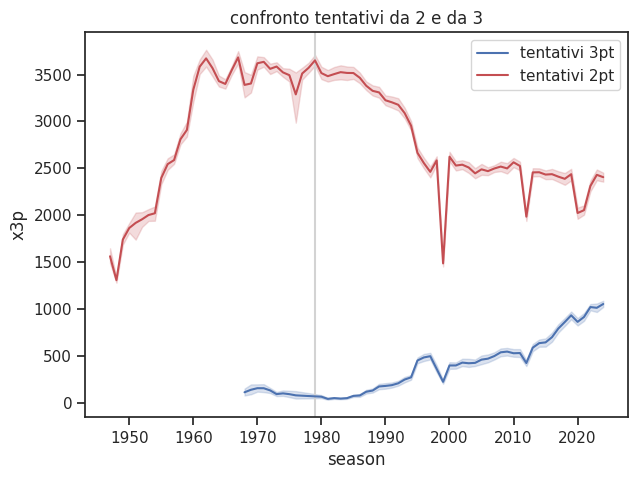

In [14]:
#f,ax = plt.subplot()

f,ax = plt.subplots(figsize=(7,5))
ax.axvline(x=1979, color='lightgrey')
sns.lineplot(total, x='season', y='x3p', label='tentativi 3pt', color='b')
sns.lineplot(total, x='season', y='x2p', label='tentativi 2pt', color='r')
ax.set_title('confronto tentativi da 2 e da 3')
plt.savefig('plots/confronto2vs3.png')

da questo grafico possiamo vedere che dall'introduzione del tiro da 3 punti il numero dei tiri da due punti è sicuramente in tred decrescente e il tiro da 3 è in trend crescente
vediamo ora però come variano le percentuali da due e tre in riferimento al numero di tentativi

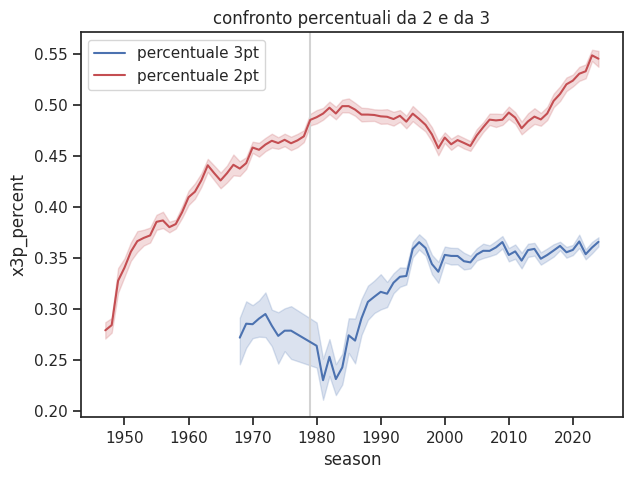

In [15]:
f,ax = plt.subplots(figsize=(7,5))
ax.axvline(x=1979, color='lightgrey')
sns.lineplot(total, x='season', y='x3p_percent', label='percentuale 3pt', color='b')
sns.lineplot(total, x='season', y='x2p_percent', label='percentuale 2pt', color='r')
ax.set_title('confronto percentuali da 2 e da 3')
plt.savefig('plots/confrontopercentuali2vs3.png')



questo grafico è interessante, vediamo come sebbene il numero minore di tiro da due nel corso del tempo, è aumentata la sua efficienza, a discapito del tiro da 3 che rimane costante attorno al 35%
una possibile spiegazione è che si va a prediligere il tiro in layup, ossia i sottomano vicino a canestro il che ovviamente è più efficacie di un tiro da due dal midrange --> ma servirebbe un'analisi di ogni singolo tiro eseguito da ogni singolo giocatore per ogni singola stagione,il che risulterebbe ozioso e poco interessante
ma posso mostrare un focus di ciò in riferimento a un singolo giocatore, LeBron James  --> fallo sul file di lebron james


vediamo l'andamento del numero di tiri sbagliati 

In [16]:
attempted3 = total.loc[:,['x3pa', 'season']].dropna().groupby('season').sum() 
made3 = total.loc[:,['x3p', 'season']].dropna().groupby('season').sum()
missed3 = attempted3['x3pa']- made3['x3p']

attempted2 = total.loc[:,['x2pa', 'season']].dropna().groupby('season').sum() 
made2 = total.loc[:,['x2p', 'season']].dropna().groupby('season').sum()
missed2 = attempted2['x2pa']- made2['x2p']

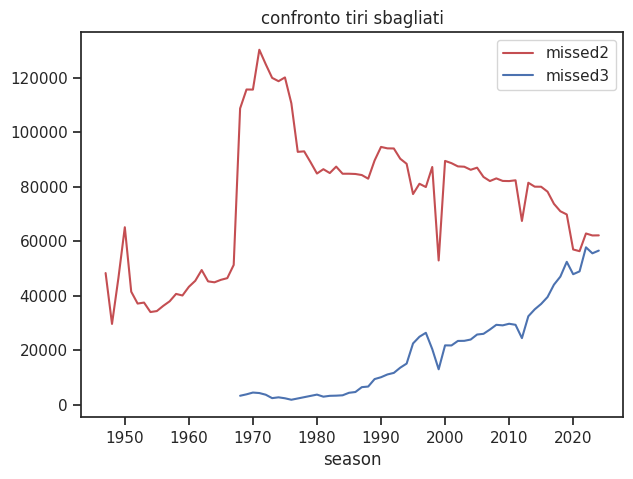

In [17]:
f,ax = plt.subplots(figsize=(7,5))
sns.lineplot(missed2, label='missed2', color='r')
sns.lineplot(missed3, label='missed3', color='b')
ax.set_title('confronto tiri sbagliati')
plt.savefig('plots/missed2vs3.png')

possiamo vedere che nelle deduzioni ottenute prima, il numero di tiri da 2 sbagliati ovviamente diminuisice, poiche l'efficienza è maggiore e il numero di tentativi è minore
allo stesso modo le percentuali di tiro da 3 sono costanti e il numero di tentativi sempre maggiore, il che lo rende tremendamente inefficiente poiche come notiamo negli anni più recenti il numero di tiri sbagliati da 3 è pari a quello dei tiri da 2

# analisi della fisicità del gioco nel corso degli anni 
un primo aspetto da analizzare potrebbe essere il numero di punti segnati in media ad ogni partita della stagione

<Axes: xlabel='season', ylabel='pts_per_game'>

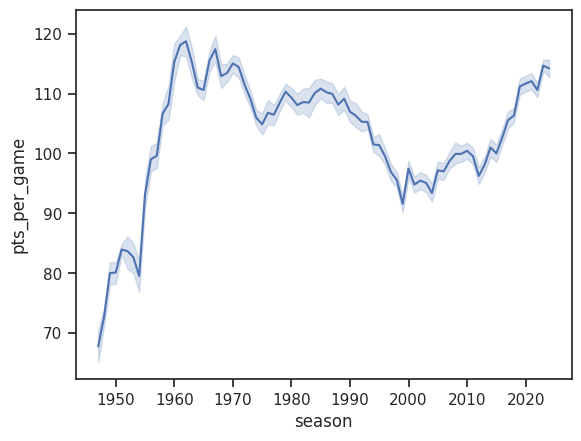

In [18]:
team_games = pd.read_csv(os.path.join('nba', 'Team Stats Per Game.csv'))
sns.lineplot(team_games, x='season', y='pts_per_game')

dal grafico si capisce chiaramente che il numero di punti per partita sia cresciuto molto negli anni, ma questo lo sapevamo gia dalla nostra analisi sul tiro da 3 punti 

proviamo a vedere ora come si evolvono le statistiche difensive delle squadre

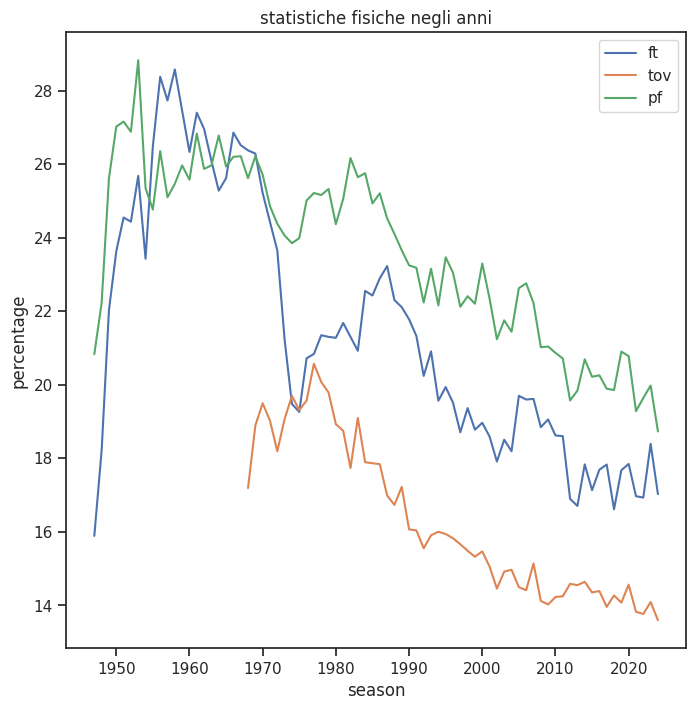

In [19]:
# non droppo i dati nulli poiche ci sono delle informazioni che per la nostra analisi ci sono utili 
f, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(team_games, x='season', y='ft_per_game', label='ft',errorbar=None)
sns.lineplot(team_games, x='season', y='tov_per_game', label='tov',errorbar=None)
#sns.lineplot(team_games, x='season', y='trb_per_game', label='reb')
sns.lineplot(team_games, x='season', y='pf_per_game', label='pf',errorbar=None)
ax.set_ylabel('percentage')
ax.set_title('statistiche fisiche negli anni')
plt.savefig('plots/statsfisiche.png')

come possiamo vedere con il passare delle stagioni il numero di tiri liberi, palle perse e falli per partita è in diminuzione, questo ci fa intuire che l'effort difensivo diminuisce col passare del tempo, prediligendo un gioco più spettacolare
questa cosa dovrebbe cambiare con i playoff dove ci si gioca il titolo, e quindi le squadre mettono loro stessi nelle partite ù
mentre in stagione regolare il numero di partite è 82 (in stagioni regolari), per cui si tira un po il freno per arrivare ai playoff più freschi e competitivi 

In [20]:
defense = total.merge(summary).loc[:,['season', 'abbreviation','drb','orb','trb', 'stl', 'blk','tov', 'pf','o_rtg', 'd_rtg','n_rtg','opp_e_fg_percent','opp_tov_percent','opp_drb_percent','pace']]
defense

,season,abbreviation,drb,orb,trb,stl,blk,tov,pf,o_rtg,d_rtg,n_rtg,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,pace
0,2024,ATL,2639.0,1024.0,3663.0,615.0,369.0,1110.0,1522.0,117.2,119.4,-2.2,0.572,12.4,75.2,100.1
1,2024,BOS,2923.0,876.0,3799.0,557.0,538.0,979.0,1326.0,123.2,111.6,11.6,0.523,10.8,76.3,97.2
2,2024,BRK,2675.0,938.0,3613.0,556.0,424.0,1076.0,1516.0,113.2,116.1,-2.9,0.543,11.4,76.0,96.9
3,2024,CHI,2677.0,916.0,3593.0,638.0,394.0,1004.0,1541.0,114.9,116.3,-1.4,0.556,12.7,76.4,96.3
4,2024,CHO,2538.0,765.0,3303.0,562.0,371.0,1129.0,1472.0,109.3,119.8,-10.5,0.572,12.3,74.5,97.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,1947,PRO,NaN,NaN,NaN,NaN,NaN,NaN,1215.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1825,1947,STB,NaN,NaN,NaN,NaN,NaN,NaN,1234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1826,1947,TRH,NaN,NaN,NaN,NaN,NaN,NaN,1271.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1827,1947,WSC,NaN,NaN,NaN,NaN,NaN,NaN,1144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='opp_tov_percent', ylabel='d_rtg'>

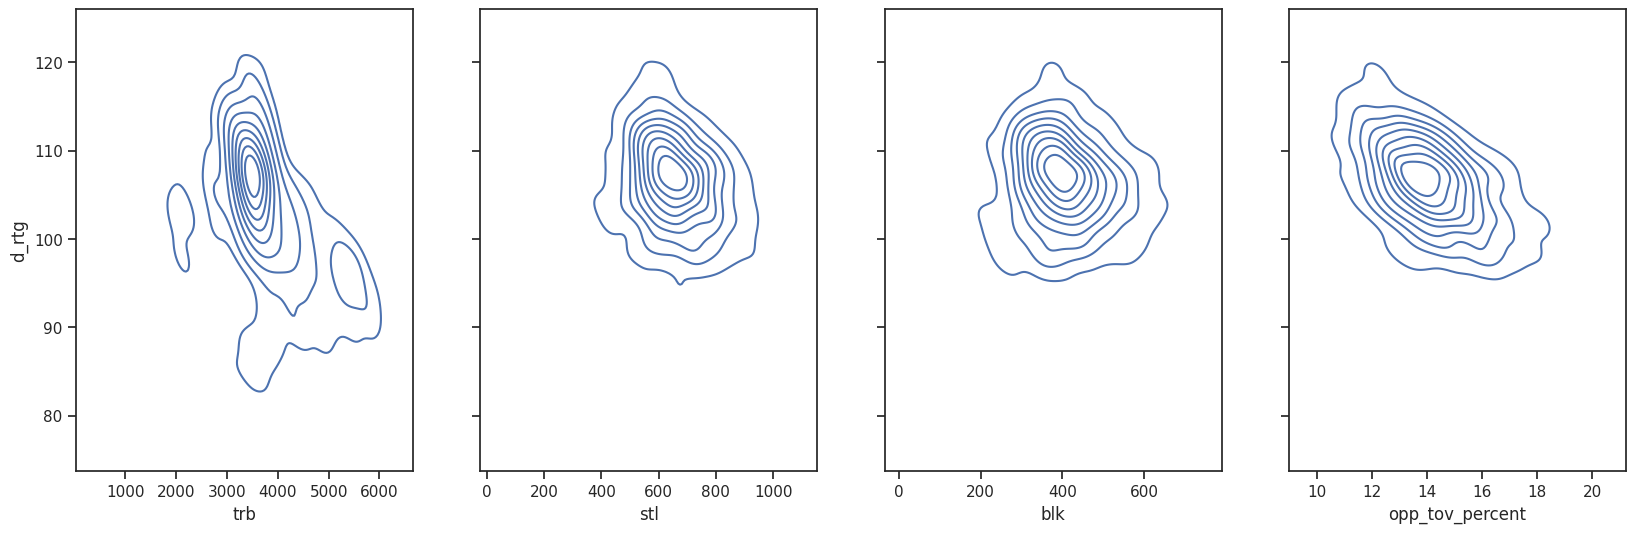

In [21]:
#sns.set_theme(style="ticks")
#sns.jointplot(defense, x='d_rtg', y='opp_e_fg_percent', kind="hex", color="#4CB391")
#sns.jointplot(defense, x='d_rtg', y='trb', kind="hex", color="#4CB391")
#plt.show()
sns.set_theme(style="ticks")
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,6), sharey=True)
sns.kdeplot(defense, x='trb', y='d_rtg', ax=ax1)
sns.kdeplot(defense, x='stl', y='d_rtg', ax=ax2)
sns.kdeplot(defense, x='blk', y='d_rtg', ax=ax3)
sns.kdeplot(defense, x='opp_tov_percent', y='d_rtg',ax=ax4)

<Axes: xlabel='season', ylabel='d_rtg'>

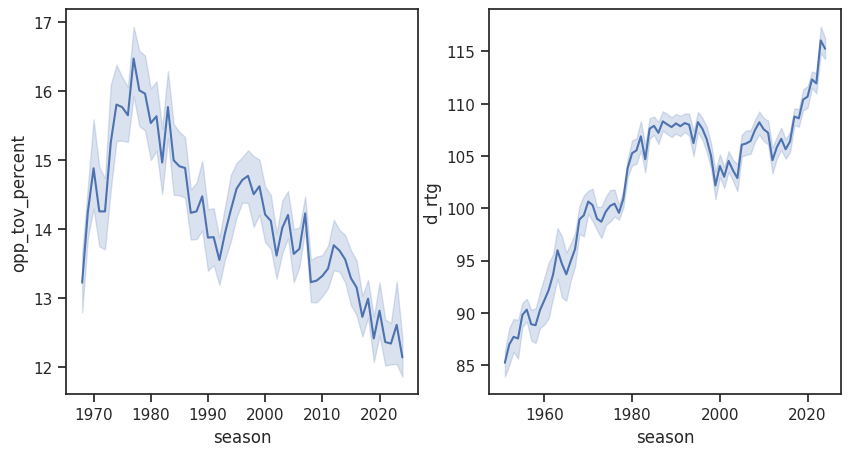

In [22]:
f,(ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(defense, x='season', y='opp_tov_percent',ax=ax1)
sns.lineplot(defense, x='season', y='d_rtg', ax=ax2)

<Axes: xlabel='season', ylabel='opp_tov_percent'>

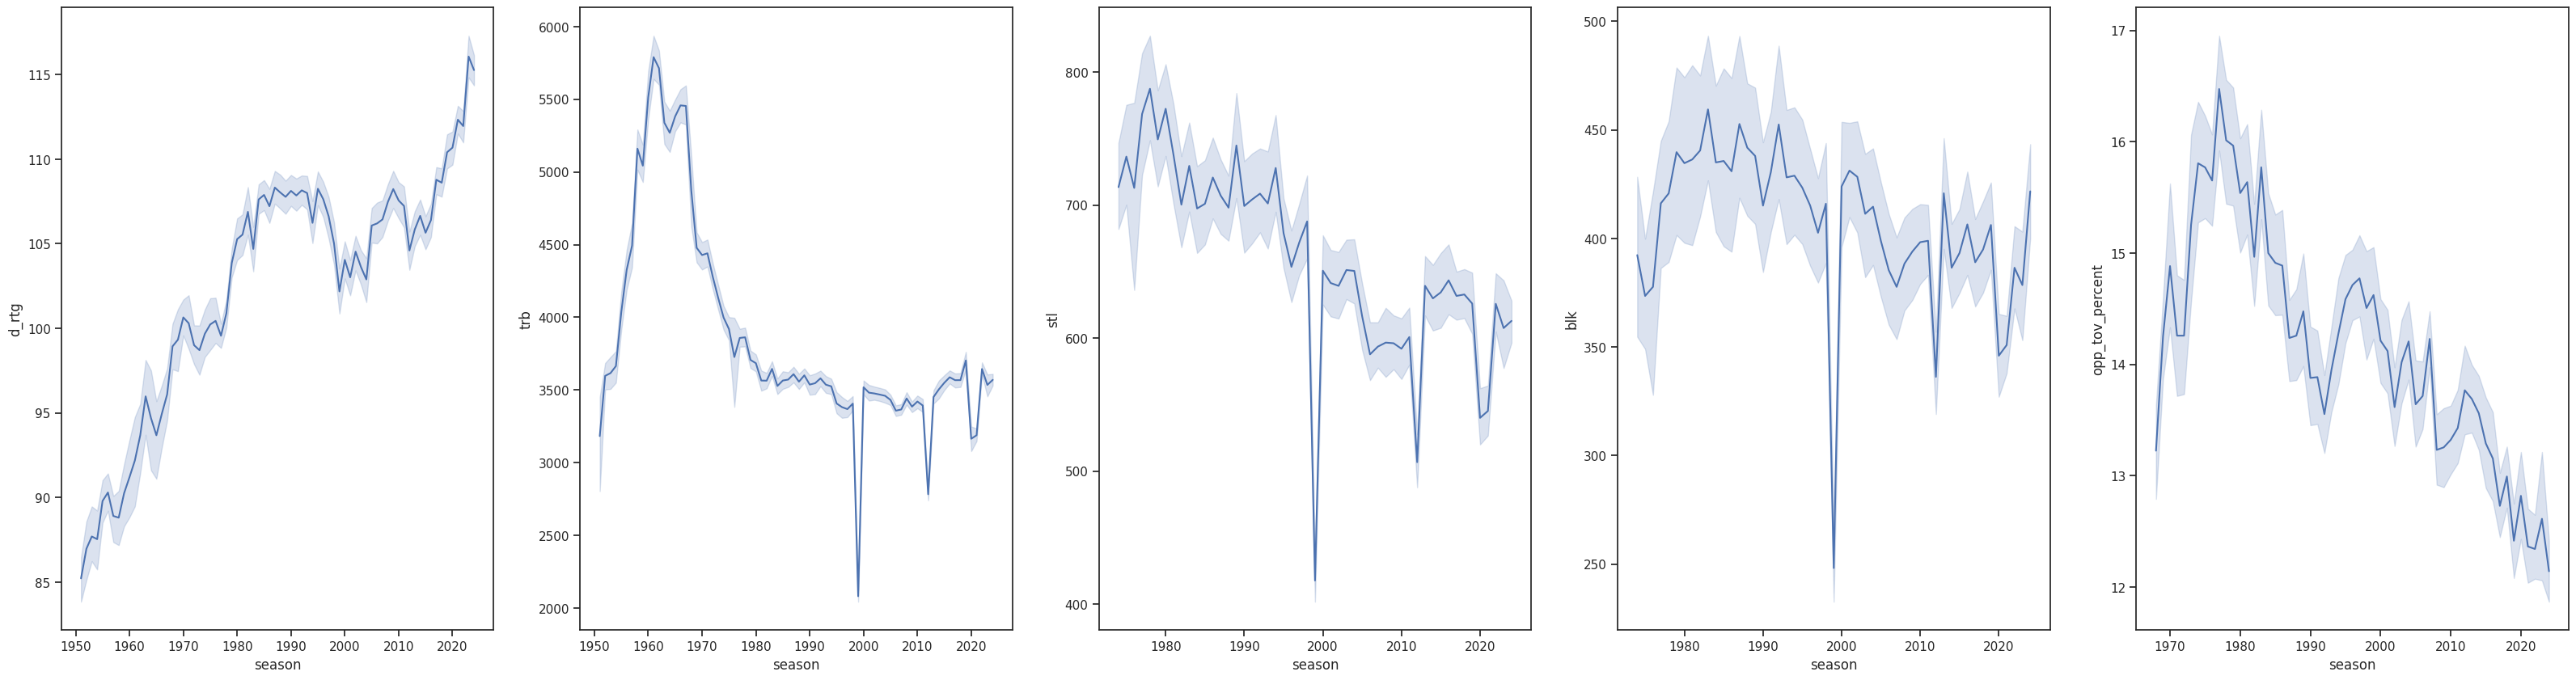

In [23]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(40,10))
sns.lineplot(defense, x='season', y='d_rtg', ax=ax1)
sns.lineplot(defense, x='season', y='trb', ax=ax2)
sns.lineplot(defense, x='season', y='stl', ax=ax3)
sns.lineplot(defense, x='season', y='blk',ax=ax4)
sns.lineplot(defense, x='season', y='opp_tov_percent',ax=ax5)

In [112]:
sns.set_theme(style="darkgrid")


# Draw a combo histogram and scatterplot with density contours
start = (np.min(defense['d_rtg'])+10, np.max(defense['opp_tov_percent']))
end = (np.max(defense['d_rtg']), np.min(defense['opp_tov_percent']))
f, ax = plt.subplots(figsize=(6, 6))
plt.axline(start, end, color="k", linestyle=(0, (5, 5)), alpha=0.39)
sns.scatterplot(defense, x='d_rtg', y='opp_tov_percent', s=5, color=".15")
sns.histplot(defense, x='d_rtg', y='opp_tov_percent', bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(defense, x='d_rtg', y='opp_tov_percent', levels=5, color="w", linewidths=1)
start = (np.min(defense['d_rtg'])+10, np.max(defense['opp_tov_percent']))
end = (np.max(defense['d_rtg']), np.min(defense['opp_tov_percent']))
ax.set_xlim(90,122)
ax.set_ylim(10,22)

ModuleNotFoundError: No module named 'ipympl'

<Axes: xlabel='pace', ylabel='opp_tov_percent'>

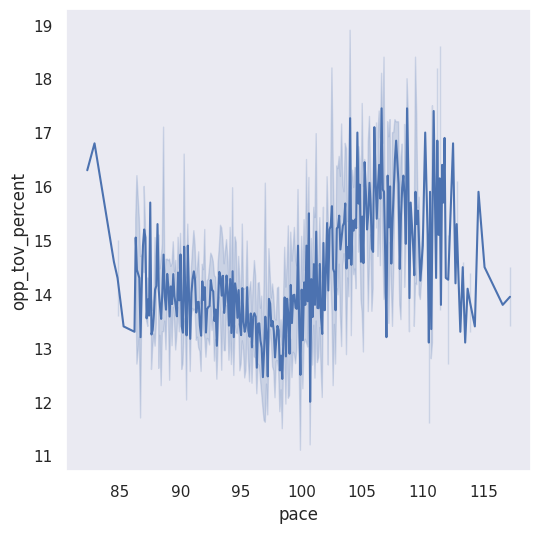

In [26]:
f, ax = plt.subplots(figsize=(6, 6))
#sns.scatterplot(defense, x='pace', y='opp_tov_percent', s=5, color=".15")
#sns.histplot(defense, x='pace', y='opp_tov_percent', bins=50, pthresh=.1, cmap="mako")
#sns.kdeplot(defense, x='pace', y='opp_tov_percent', levels=5, color="w", linewidths=1)
sns.lineplot(defense, x='pace', y='opp_tov_percent')

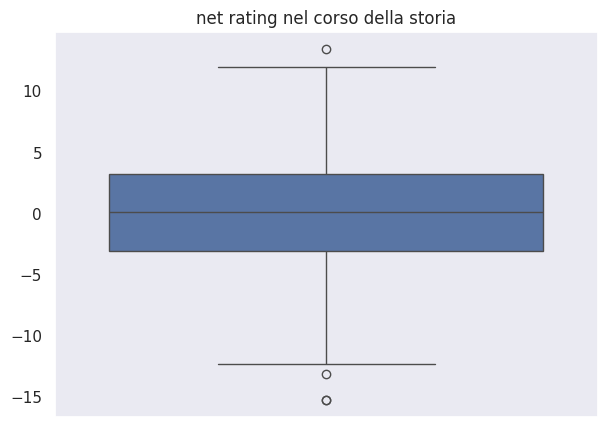

In [27]:
#sns.lineplot(defense, x='season', y='d_rtg')
#sns.lineplot(defense,x='season', y='o_rtg')
#sns.lineplot(defense, x='season', y='n_rtg')
f,ax = plt.subplots(figsize=(7,5))
sns.boxplot(defense['n_rtg'])
ax.set_title('net rating nel corso della storia')
ax.set_ylabel('')
plt.show()

<Axes: xlabel='d_rtg', ylabel='opp_e_fg_percent'>

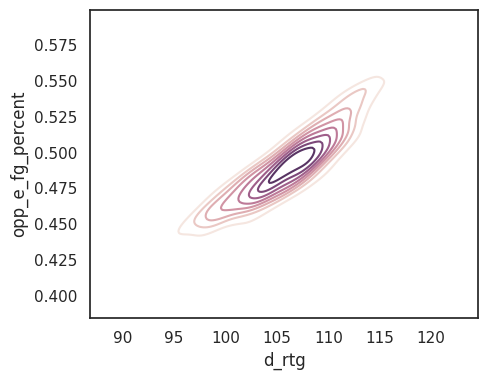

In [33]:
#sns.lineplot(defense, x='season', y='d_rtg')
#print(sp.stats.kendalltau(defense.dropna()['d_rtg'], defense.dropna()['trb'])[1])
sns.set_theme(style="white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))
y = ['trb', 'stl', 'blk','tov', 'pf', 'd_rtg','n_rtg','opp_e_fg_percent','opp_tov_percent']
# Create a cubehelix colormap to use with kdeplot
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
# Generate and plot a random bivariate dataset
#x, y = rs.normal(size=(2, 50))
sns.kdeplot(defense,
        x='d_rtg', y='opp_e_fg_percent',
        cmap=cmap, ax=ax
    )

vediamo se troviamo delle correlazioni interessanti con gli indici di correlazione

In [34]:
# eliminati i dati nulli, nelle prime stagioni ci sono troppi dati nulli, che non portano quindi informazioni utili 
for i in team_games.columns[5:]:
    print(i, sp.stats.pearsonr(team_games.dropna()['stl_per_game'],team_games.dropna()[i])[1])
    print(i, sp.stats.spearmanr(team_games.dropna()['stl_per_game'],team_games.dropna()[i])[1])
    print(i, sp.stats.kendalltau(team_games.dropna()['stl_per_game'],team_games.dropna()[i])[1])

g 0.1846860015539678
g 0.0010866735648512684
g 0.0011211115508771039
mp_per_game 0.016472644825041946
mp_per_game 0.04545754107243106
mp_per_game 0.04646291412291745
fg_per_game 1.4692454096388383e-40
fg_per_game 1.3450771005292458e-34
fg_per_game 4.9047162932012945e-34
fga_per_game 5.301168340882556e-33
fga_per_game 2.265735273969386e-26
fga_per_game 4.357973736731183e-26
fg_percent 1.7864573456038597e-20
fg_percent 5.43472666723857e-20
fg_percent 9.253691570357495e-20
x3p_per_game 1.407117343479305e-44
x3p_per_game 3.3474496030073595e-48
x3p_per_game 2.1615902831066906e-45
x3pa_per_game 8.534385324387862e-43
x3pa_per_game 5.984935972832622e-47
x3pa_per_game 2.4864816829274017e-44
x3p_percent 1.127213877772379e-46
x3p_percent 2.222610973322351e-37
x3p_percent 6.372123913503736e-36
x2p_per_game 2.6548670753575707e-76
x2p_per_game 1.3788334030921772e-66
x2p_per_game 1.854026742435451e-63
x2pa_per_game 7.849082809716862e-71
x2pa_per_game 9.295089529081116e-61
x2pa_per_game 9.515498309065

spearman --> rebound con pf_per_game, relazione con i minuti è scontata
pearson --> x3p per game

# grafici per vedere altri dati
vediamo se si scopre qualcosa di interessante

In [35]:
total

,season,lg,team,abbreviation,playoffs,g,mp,fg,fga,fg_percent,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2024,NBA,Atlanta Hawks,ATL,False,82.0,19855.0,3529.0,7584.0,0.465,...,0.797,1024.0,2639.0,3663.0,2180.0,615.0,369.0,1110.0,1522.0,9703.0
1,2024,NBA,Boston Celtics,BOS,True,82.0,19830.0,3601.0,7396.0,0.487,...,0.807,876.0,2923.0,3799.0,2207.0,557.0,538.0,979.0,1326.0,9887.0
2,2024,NBA,Brooklyn Nets,BRK,False,82.0,19805.0,3334.0,7307.0,0.456,...,0.756,938.0,2675.0,3613.0,2102.0,556.0,424.0,1076.0,1516.0,9050.0
3,2024,NBA,Chicago Bulls,CHI,False,82.0,19980.0,3448.0,7339.0,0.470,...,0.791,916.0,2677.0,3593.0,2048.0,638.0,394.0,1004.0,1541.0,9206.0
4,2024,NBA,Charlotte Hornets,CHO,False,82.0,19730.0,3281.0,7133.0,0.460,...,0.786,765.0,2538.0,3303.0,2033.0,562.0,371.0,1129.0,1472.0,8740.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,1947,BAA,Providence Steamrollers,PRO,False,60.0,NaN,1629.0,5582.0,0.292,...,0.655,NaN,NaN,NaN,481.0,NaN,NaN,NaN,1215.0,4350.0
1841,1947,BAA,St. Louis Bombers,STB,True,61.0,NaN,1601.0,5877.0,0.272,...,0.616,NaN,NaN,NaN,292.0,NaN,NaN,NaN,1234.0,4064.0
1842,1947,BAA,Toronto Huskies,TRH,False,60.0,NaN,1515.0,5672.0,0.267,...,0.622,NaN,NaN,NaN,463.0,NaN,NaN,NaN,1271.0,3996.0
1843,1947,BAA,Washington Capitols,WSC,True,60.0,NaN,1723.0,5794.0,0.297,...,0.706,NaN,NaN,NaN,378.0,NaN,NaN,NaN,1144.0,4428.0


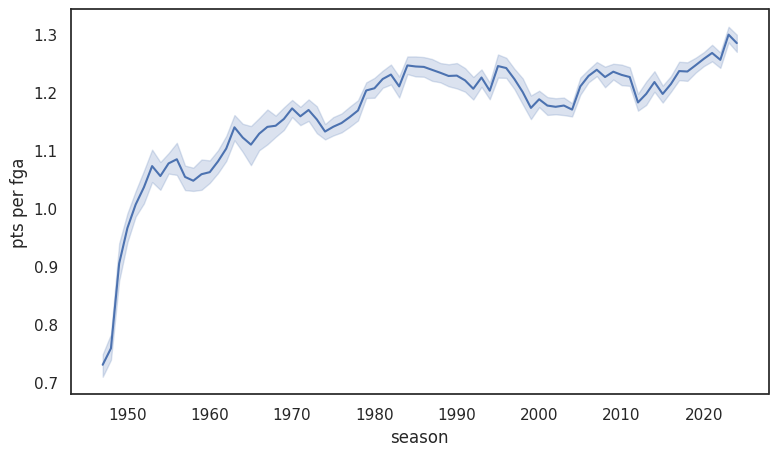

In [36]:
avgl = total[total['team'] =='League Average']
a = total['pts']/total['fga']
f,ax=plt.subplots(figsize=(9,5))
sns.lineplot(total, x='season', y=a)
ax.set_ylabel('pts per fga')
plt.show()

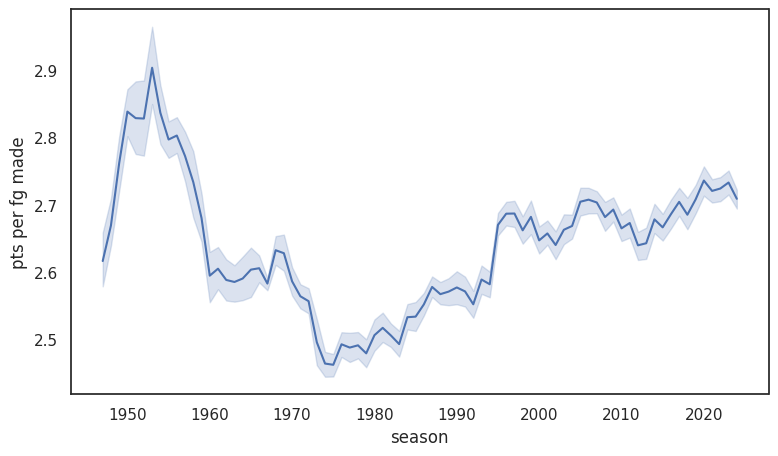

In [37]:
a = total['pts']/total['fg']
f,ax=plt.subplots(figsize=(9,5))
sns.lineplot(total, x='season', y=a)
ax.set_ylabel('pts per fg made')
plt.show()

In [38]:
a = total[total['season']==2024][total.columns[7:]]
a.columns

Index(['fg', 'fga', 'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

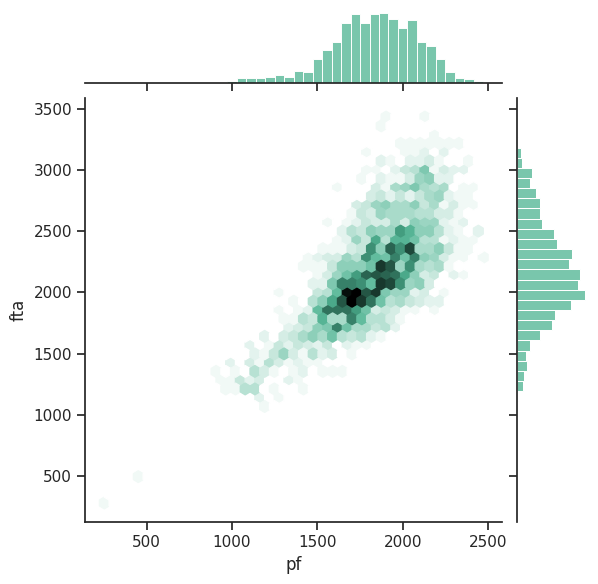

In [39]:
#f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize=(7,15), sharex=True)
#sns.lineplot(total, x='season', y='trb', label='trb', ax=ax1)
#sns.lineplot(total, x='season', y='pf', label='pf', ax=ax2)
#sns.lineplot(total, x='season', y='fta', label='fta')
#sns.lineplot(total, x='season', y='tov', label='tov', ax=ax3)
#sns.lineplot(total, x='season', y='stl', label='stl', ax=ax4)
#sns.lineplot(total, x='season', y='blk', label='blk', ax=ax5)
sns.set_theme(style="ticks")

sns.jointplot(total, x='pf', y='fta', kind="hex", color="#4CB391")
plt.show()

<Axes: xlabel='pf', ylabel='tov'>

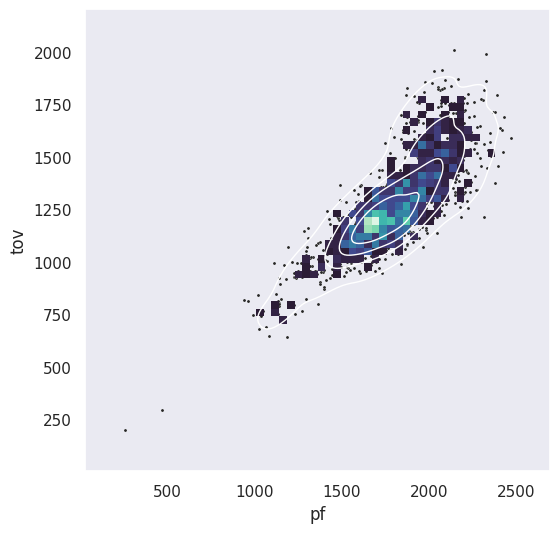

In [40]:

sns.set_theme(style="dark")


# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(total, x='pf', y='tov', s=5, color=".15")
sns.histplot(total, x='pf', y='tov', bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(total, x='pf', y='tov', levels=5, color="w", linewidths=1)

<Axes: xlabel='trb', ylabel='drb'>

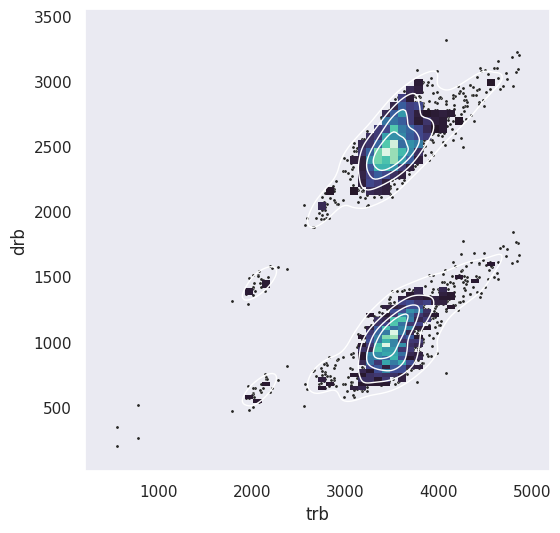

In [41]:
sns.set_theme(style="dark")


# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(total, x='trb', y='drb', s=5, color=".15")
sns.histplot(total, x='trb', y='drb', bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(total, x='trb', y='drb', levels=5, color="w", linewidths=1)
sns.scatterplot(total, x='trb', y='orb', s=5, color=".15")
sns.histplot(total, x='trb', y='orb', bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(total, x='trb', y='orb', levels=5, color="w", linewidths=1)

<Axes: xlabel='pts', ylabel='orb'>

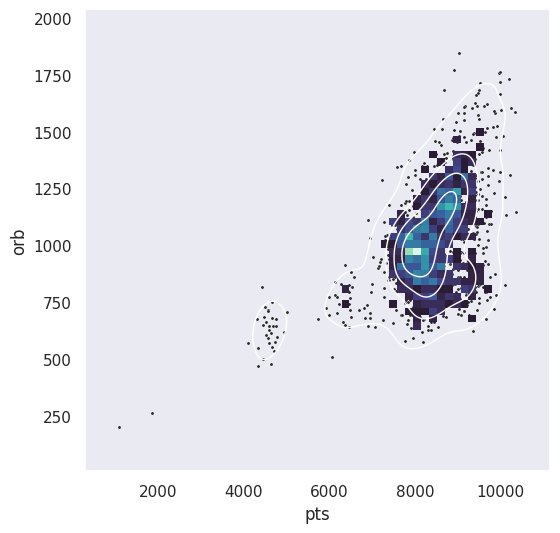

In [42]:
sns.set_theme(style="dark")


# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(total, x='pts', y='orb', s=5, color=".15")
sns.histplot(total, x='pts', y='orb', bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(total, x='pts', y='orb', levels=5, color="w", linewidths=1)

<Axes: xlabel='e_fg_percent', ylabel='ts_percent'>

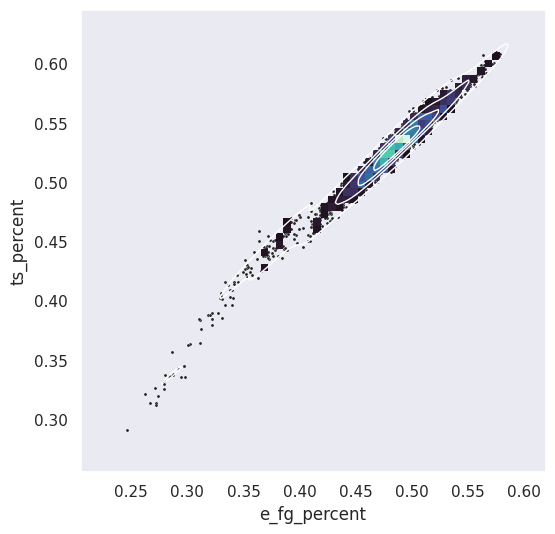

In [43]:
sns.set_theme(style="dark")


# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(summary, x='e_fg_percent', y='ts_percent', s=5, color=".15")
sns.histplot(summary, x='e_fg_percent', y='ts_percent', bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(summary, x='e_fg_percent', y='ts_percent', levels=5, color="w", linewidths=1)

<Axes: xlabel='x3p_ar', ylabel='ts_percent'>

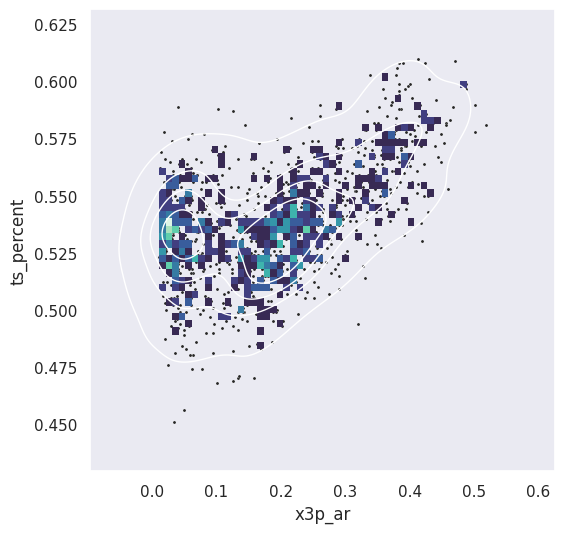

In [44]:
sns.set_theme(style="dark")


# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(summary, x='x3p_ar', y='ts_percent', s=5, color=".15")
sns.histplot(summary, x='x3p_ar', y='ts_percent', bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(summary, x='x3p_ar', y='ts_percent', levels=5, color="w", linewidths=1)

# presentazione punto 4
statistiche avanzate da analizzare:
pace = numero di possessi a partita
ts_percent = quanto efficientemente la squadra tira 
e_fg_percent = considera il fatto che i tiri da 3 valgono un punto in più 

In [45]:
playoffs = summary[summary['playoffs'] ==True]
notplayoffs = summary[summary['playoffs'] ==False]
summary.columns

Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'age', 'w', 'l',
       'pw', 'pl', 'mov', 'sos', 'srs', 'o_rtg', 'd_rtg', 'n_rtg', 'pace',
       'f_tr', 'x3p_ar', 'ts_percent', 'e_fg_percent', 'tov_percent',
       'orb_percent', 'ft_fga', 'opp_e_fg_percent', 'opp_tov_percent',
       'opp_drb_percent', 'opp_ft_fga', 'arena', 'attend', 'attend_g'],
      dtype='object')

<Axes: xlabel='w', ylabel='e_fg_percent'>

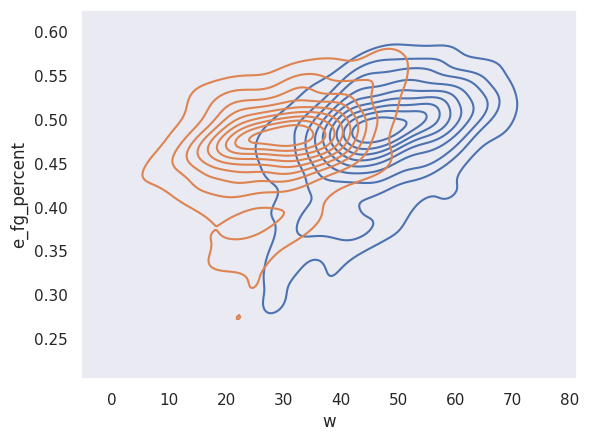

In [46]:
#sns.kdeplot(summary, x='w', y='ts_percent')
sns.kdeplot(playoffs, x='w', y='e_fg_percent')
sns.kdeplot(notplayoffs, x='w', y='e_fg_percent')

<Axes: ylabel='pace'>

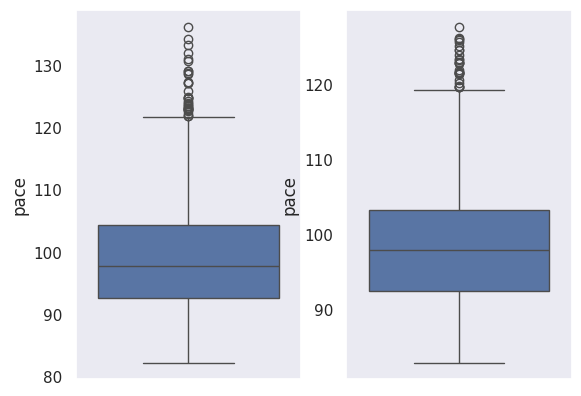

In [47]:

#plt.subplot(121)
#sns.boxplot(playoffs['ts_percent'])
#plt.subplot(122)
#sns.boxplot(notplayoffs['ts_percent'])
#sns.kdeplot(playoffs['e_fg_percent'])
#sns.kdeplot(notplayoffs['e_fg_percent'])
plt.subplot(121)
sns.boxplot(playoffs['pace'])
plt.subplot(122)
sns.boxplot(notplayoffs['pace'])

In [48]:
total = summary.merge(total.merge(team_games)).drop(['arena', 'attend'], axis=1)
for i in total.columns[13:-3]:
    print(i, sp.stats.pearsonr(total.dropna()['l'],total.dropna()[i])[1])
    print(i, sp.stats.spearmanr(total.dropna()['l'],total.dropna()[i])[1])
    print(i, sp.stats.kendalltau(total.dropna()['l'],total.dropna()[i])[1])

o_rtg 1.800146615669687e-67
o_rtg 6.27630280854752e-69
o_rtg 6.510513868856524e-64
d_rtg 1.8940880258487946e-51
d_rtg 3.215248741060871e-54
d_rtg 3.5582210425585367e-50
n_rtg 0.0
n_rtg 0.0
n_rtg 1.748329485282637e-272
pace 0.5642946563763889
pace 0.4296614607193604
pace 0.4224065668579027
f_tr 0.004828436193161698
f_tr 0.007796875874265093
f_tr 0.008565775983184854
x3p_ar 0.01812227548104433
x3p_ar 0.0048822393415953414
x3p_ar 0.004424106548591144
ts_percent 3.1608058477292364e-50
ts_percent 4.349965123823543e-48
ts_percent 1.7458815987194912e-45
e_fg_percent 3.2193872469712674e-41
e_fg_percent 5.2733144200573715e-40
e_fg_percent 4.4700669816024195e-38
tov_percent 1.6955514547974205e-10
tov_percent 1.8984194803451259e-10
tov_percent 2.8196281553550794e-10
orb_percent 0.2724233066990437
orb_percent 0.6370407332237411
orb_percent 0.6661573797760046
ft_fga 2.1998870350451867e-05
ft_fga 3.326752758736401e-05
ft_fga 2.8117307305550166e-05
opp_e_fg_percent 7.187742300468429e-32
opp_e_fg_perc

pearson --> wins con x3pa_per game

In [50]:
total = summary.merge(total.merge(team_games))
total.columns

Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'age', 'w', 'l',
       'pw', 'pl', 'mov', 'sos', 'srs', 'o_rtg', 'd_rtg', 'n_rtg', 'pace',
       'f_tr', 'x3p_ar', 'ts_percent', 'e_fg_percent', 'tov_percent',
       'orb_percent', 'ft_fga', 'opp_e_fg_percent', 'opp_tov_percent',
       'opp_drb_percent', 'opp_ft_fga', 'arena', 'attend', 'attend_g', 'g',
       'mp', 'fg', 'fga', 'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p',
       'x2pa', 'x2p_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'x3p_per_game', 'x3pa_per_game', 'x2p_per_game',
       'x2pa_per_game', 'ft_per_game', 'fta_per_game', 'orb_per_game',
       'drb_per_game', 'trb_per_game', 'ast_per_game', 'stl_per_game',
       'blk_per_game', 'tov_per_game', 'pf_per_game', 'pts_per_game'],
      dtype='object')

<Axes: xlabel='pace', ylabel='l'>

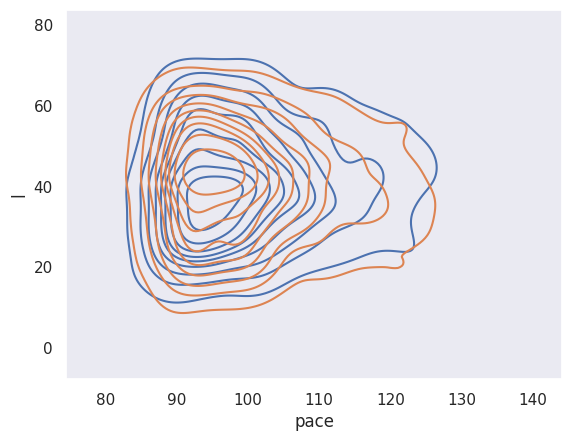

In [51]:
sns.kdeplot(total, x='pace', y='l')
sns.kdeplot(total, x='pace', y='w')

<Axes: xlabel='ts_percent', ylabel='pace'>

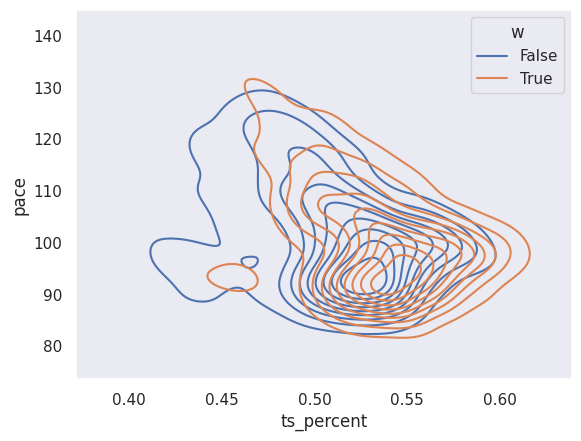

In [52]:
piu50 = total[total['w']>=41]
meno50 = total[total['w']<41]
sns.kdeplot(total, x='ts_percent', y='pace',hue=total['w']>=41)
#sns.kdeplot(total, x='ts_percent', hue=total['playoffs']==True)

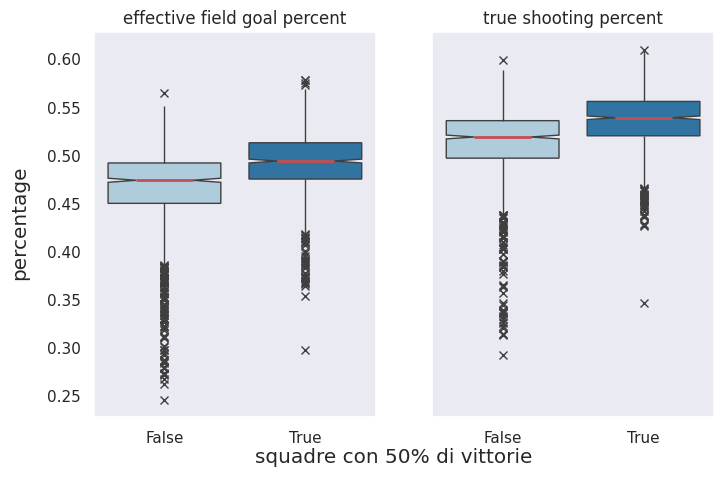

In [53]:
f,(ax1,ax2) = plt.subplots(1,2, figsize=(8,5), sharey=True)
g=sns.boxplot(
    data=total, x=total['w']>=41, y="e_fg_percent",hue=total['w']>=41,legend=False,
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
   #boxprops={"facecolor": (.7, .7, .7, .5)},
    medianprops={"color": "r", "linewidth": 2}, ax=ax1, palette="Paired"
)
g.set(xlabel='', ylabel='')
ax1.set_title('effective field goal percent')
h=sns.boxplot(
    data=total, x=total['w']>=41, y="ts_percent",hue=total['w']>=41,legend=False,
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    #boxprops={"facecolor": (.5, .7, .3, .5)},
    medianprops={"color": "r", "linewidth": 2},ax=ax2, palette="Paired"
)
ax2.set_title('true shooting percent')
h.set(xlabel='', ylabel='')
f.supylabel('percentage')
f.supxlabel('squadre con 50% di vittorie')
plt.show()
#sns.boxplot(total, x='w', y='ts_percent',hue=total['w']>=41)
#sns.boxplot(total, x=total['w']>=41, y='e_fg_percent',hue=total['w']>=41)

<Axes: xlabel='w', ylabel='e_fg_percent'>

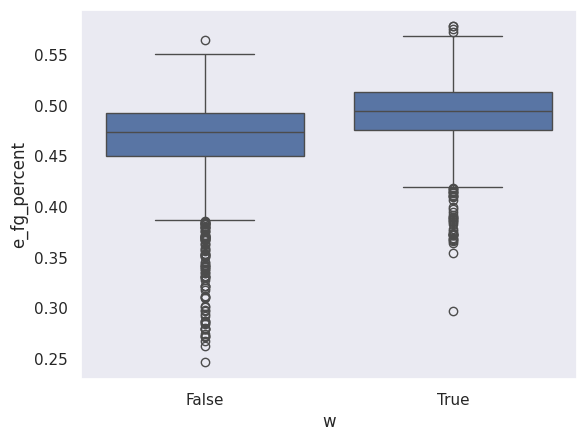

In [54]:
sns.boxplot(total, x=total['w']>=41, y='e_fg_percent')

<Axes: xlabel='w', ylabel='pace'>

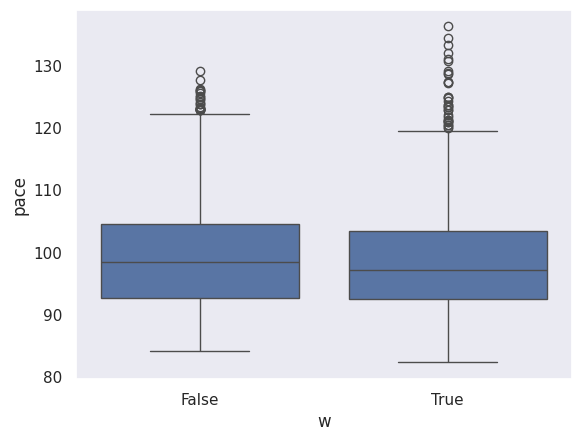

In [55]:
sns.boxplot(total, x=total['w']>=41, y='pace')